In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/housing.csv')

In [3]:
df.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [4]:
#year is in the format yyyy-dd-mm, the following code creates a Year and Month columns to make data processing easier

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.day

In [5]:
display(df.head(2), df.shape)

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,Year,Month
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0,2004,1
1,2004-01-02,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0,2004,2


(135250, 56)

In [6]:
#using df.info() to get some extra insight on the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135250 entries, 0 to 135249
Data columns (total 56 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    135250 non-null  datetime64[ns]
 1   RegionName              135250 non-null  object        
 2   AreaCode                135250 non-null  object        
 3   AveragePrice            135250 non-null  float64       
 4   Index                   135250 non-null  float64       
 5   IndexSA                 4539 non-null    float64       
 6   1m%Change               134807 non-null  float64       
 7   12m%Change              130210 non-null  float64       
 8   AveragePriceSA          4539 non-null    float64       
 9   SalesVolume             130751 non-null  float64       
 10  DetachedPrice           129000 non-null  float64       
 11  DetachedIndex           129000 non-null  float64       
 12  Detached1m%Change       128591

There are some columns that have plenty of null values. As the only interest of this analysis is to see the variation of prices over time, the following code selects some relevant columns to simplify the dataset

In [7]:
relevant_cols = ['Date','RegionName','AveragePrice','SalesVolume','DetachedPrice','SemiDetachedPrice','TerracedPrice','FlatPrice','Year','Month']
df_housing = df[relevant_cols]

In [8]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135250 entries, 0 to 135249
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               135250 non-null  datetime64[ns]
 1   RegionName         135250 non-null  object        
 2   AveragePrice       135250 non-null  float64       
 3   SalesVolume        130751 non-null  float64       
 4   DetachedPrice      129000 non-null  float64       
 5   SemiDetachedPrice  129013 non-null  float64       
 6   TerracedPrice      129040 non-null  float64       
 7   FlatPrice          129338 non-null  float64       
 8   Year               135250 non-null  int32         
 9   Month              135250 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(2), object(1)
memory usage: 9.3+ MB


The data is now clearer to read, and it is now much easier to identify null values across the DataFrame

In [9]:
df_housing.nunique()

Date                    646
RegionName              421
AveragePrice         131158
SalesVolume            7724
DetachedPrice        128848
SemiDetachedPrice    128864
TerracedPrice        128892
FlatPrice            129128
Year                     55
Month                    12
dtype: int64

The year columns shows a range wider than expected, as 135250 rows over 421 regions each having 12 rows per calendar year would give approximately 26yrs worth of data (135250/(421 *12) = approx. 26.8yrs which is much lower than the 55yrs above

In [10]:
df_housing.describe()

,Date,AveragePrice,SalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,Year,Month
count,135250,1.352500e+05,130751.000000,1.290000e+05,1.290130e+05,1.290400e+05,1.293380e+05,135250.000000,135250.000000
mean,2007-09-24 16:57:14.493160704,1.663382e+05,1216.732140,2.930692e+05,1.874907e+05,1.486868e+05,1.145485e+05,2007.714854,6.484177
min,1968-01-04 00:00:00,2.712016e+03,2.000000,4.064610e+04,2.571306e+04,2.045985e+04,1.619875e+04,1968.000000,1.000000
25%,2001-01-09 00:00:00,9.331214e+04,139.000000,1.625800e+05,1.007011e+05,7.876238e+04,6.503723e+04,2001.000000,3.000000
50%,2008-01-09 00:00:00,1.462071e+05,215.000000,2.358328e+05,1.478856e+05,1.189835e+05,9.784212e+04,2008.000000,6.000000
75%,2015-01-05 00:00:00,2.086069e+05,373.000000,3.400492e+05,2.159324e+05,1.757569e+05,1.379296e+05,2015.000000,9.000000
max,2022-01-01 00:00:00,1.479252e+06,156531.000000,4.269390e+06,4.364062e+06,2.882060e+06,1.287157e+06,2022.000000,12.000000
std,NaN,1.119901e+05,7591.352117,2.538515e+05,1.938870e+05,1.423191e+05,8.790561e+04,8.794493,3.459910


Before we dive into the analysis of the year column, let's rename the remaining columns!

In [11]:
df_housing.rename(columns = {
    'Date': 'date', 'RegionName': 'region',
    'AveragePrice': 'average_price',
    'SalesVolume': 'sales_volume',
    'DetachedPrice': 'detached_price',
    'SemiDetachedPrice': 'semidetached_price',
    'TerracedPrice': 'terraced_price',
    'FlatPrice':'flat_price',
    'Year':'year',
    'Month':'month'},inplace = True)

df_housing.head(2)

/var/folders/c1/nch3_nfs70g32zj8hldyy7ph0000gn/T/ipykernel_1512/83984849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing.rename(columns = {


,date,region,average_price,sales_volume,detached_price,semidetached_price,terraced_price,flat_price,year,month
0,2004-01-01,Aberdeenshire,81693.66964,388.0,122490.0641,70563.15784,55319.63336,48016.07412,2004,1
1,2004-01-02,Aberdeenshire,81678.76231,326.0,121280.8840,70804.42408,55720.07531,49030.18133,2004,2


In [12]:
df_housing['year'].value_counts()

year
2015    5052
2013    5052
2019    5052
2018    5052
2017    5052
2016    5052
2005    5052
2014    5052
2012    5052
2021    5052
2011    5052
2010    5052
2009    5052
2008    5052
2007    5052
2006    5052
2020    5052
2004    4920
1999    4524
2002    4524
2001    4524
2000    4524
2003    4524
1998    4524
1997    4524
1996    4524
1995    4524
2022     421
1993     156
1994     156
1992     147
1970     120
1971     120
1991     120
1990     120
1989     120
1988     120
1987     120
1986     120
1985     120
1984     120
1983     120
1982     120
1981     120
1980     120
1969     120
1978     120
1977     120
1976     120
1975     120
1974     120
1973     120
1972     120
1979     120
1968      90
Name: count, dtype: int64

The majority of data between is 1995 and 2021, so we can use a mask to filter the relevant data.
Let's create a new dataframe for modern housing df_mod_housing and apply the relevant masking

In [13]:
df_mod_housing = df_housing[df_housing['year']>= 1995]
df_mod_housing = df_mod_housing[df_mod_housing['year']<2022]

In [14]:
df_mod_housing.describe()

,date,average_price,sales_volume,detached_price,semidetached_price,terraced_price,flat_price,year,month
count,131520,1.315200e+05,130751.000000,1.285920e+05,1.286040e+05,1.286310e+05,1.289280e+05,131520.000000,131520.000000
mean,2008-05-06 02:38:50.802919680,1.694942e+05,1216.732140,2.922934e+05,1.870055e+05,1.483184e+05,1.143412e+05,2008.329197,6.500000
min,1995-01-01 00:00:00,2.310073e+04,2.000000,4.064610e+04,2.571306e+04,2.045985e+04,1.619875e+04,1995.000000,1.000000
25%,2002-01-04 00:00:00,9.856298e+04,139.000000,1.622767e+05,1.004751e+05,7.857514e+04,6.491625e+04,2002.000000,3.750000
50%,2008-01-12 00:00:00,1.483271e+05,215.000000,2.353712e+05,1.475714e+05,1.187646e+05,9.769984e+04,2008.000000,6.500000
75%,2015-01-06 00:00:00,2.103039e+05,373.000000,3.392853e+05,2.153604e+05,1.752874e+05,1.376980e+05,2015.000000,9.250000
max,2021-01-12 00:00:00,1.479252e+06,156531.000000,4.269390e+06,4.364062e+06,2.882060e+06,1.287157e+06,2021.000000,12.000000
std,NaN,1.106972e+05,7591.352117,2.529732e+05,1.932711e+05,1.418958e+05,8.771304e+04,7.721919,3.452066


In [15]:
#let's move the year and month to the top of the DataFrame

In [16]:
cols = df_mod_housing.columns.tolist()
cols = cols[-2:] + cols[:-2]
cols

['year',
 'month',
 'date',
 'region',
 'average_price',
 'sales_volume',
 'detached_price',
 'semidetached_price',
 'terraced_price',
 'flat_price']

In [17]:
df_mod_housing = df_mod_housing[cols]
df_mod_housing.head(2)

,year,month,date,region,average_price,sales_volume,detached_price,semidetached_price,terraced_price,flat_price
0,2004,1,2004-01-01,Aberdeenshire,81693.66964,388.0,122490.0641,70563.15784,55319.63336,48016.07412
1,2004,2,2004-01-02,Aberdeenshire,81678.76231,326.0,121280.8840,70804.42408,55720.07531,49030.18133


It should be expected that a simple interpolation can fill the NaN values without affecting the overall statistics of the data

In [18]:
df_copy = df_mod_housing.copy().interpolate()

In [19]:
#I will focus on the following sub-matrix with NaN values to avoid doing maths on timeline data

In [20]:
d = df_mod_housing[['sales_volume','detached_price','semidetached_price','terraced_price','flat_price']].describe()
e = df_copy[['sales_volume','detached_price','semidetached_price','terraced_price','flat_price']].describe()

In [21]:
interpolation_perc_change = e*100/d - 100
interpolation_perc_change

,sales_volume,detached_price,semidetached_price,terraced_price,flat_price
count,0.588141,2.276969,2.267426,2.245959,2.010424
mean,2.501887,-0.283696,-0.336743,0.529408,-0.320469
std,0.854748,-0.804824,-0.898652,1.133413,-0.743328
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.101954,0.087345,0.395199,0.081577
50%,0.000000,-0.053281,-0.064985,0.116984,-0.228151
75%,0.536193,-0.236471,-0.263840,0.093782,-0.351177
max,0.000000,0.000000,0.000000,0.000000,0.000000


Being within 1.2% drift of most parameters, we can go ahead and use the .interpolate() method on mod_housing

In [22]:
df_mod_housing = df_mod_housing.interpolate()

In [23]:
#let's see if there is any null data that have been missed
df_mod_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131520 entries, 0 to 135248
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   year                131520 non-null  int32         
 1   month               131520 non-null  int32         
 2   date                131520 non-null  datetime64[ns]
 3   region              131520 non-null  object        
 4   average_price       131520 non-null  float64       
 5   sales_volume        131520 non-null  float64       
 6   detached_price      131520 non-null  float64       
 7   semidetached_price  131520 non-null  float64       
 8   terraced_price      131520 non-null  float64       
 9   flat_price          131520 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(2), object(1)
memory usage: 10.0+ MB


It is now time to see how prices have changed over time, here's an example of prices of flats in York over time

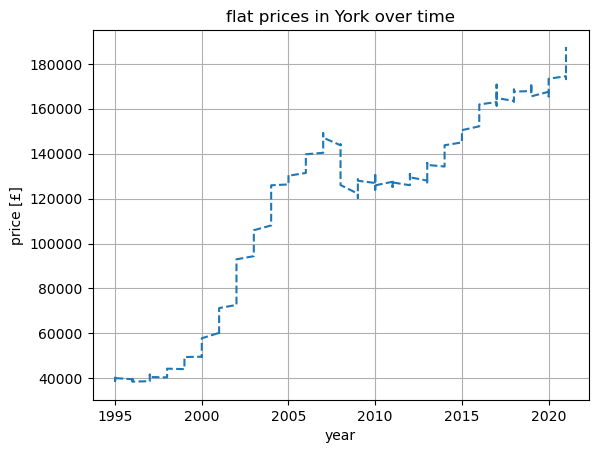

In [24]:
york_plot = plt.plot(df_mod_housing[df_mod_housing['region']=='York']['year'],\
         df_mod_housing[df_mod_housing['region']=='York']['flat_price'],\
         linestyle = '--')
plt.title('flat prices in York over time')
plt.grid()
plt.xlabel('year');
plt.ylabel('price [£]');

How does this compare to the income? df_income dataset will be loaded from the ONS database

In [25]:
df_income = pd.read_csv('data/income.csv')
display(df_income.head(2),df_income.tail(2), df_income.describe())

,Year,Mean,Median
0,1977,15246,13682
1,1978,16629,15137


,Year,Mean,Median
43,2020/21,38994,32529
44,2021/22,39328,32349


,Mean,Median
count,45.000000,45.000000
mean,29143.977778,24031.600000
std,7907.769940,5778.047226
min,15246.000000,13682.000000
25%,23627.000000,19877.000000
50%,29623.000000,24605.000000
75%,36621.000000,29165.000000
max,39328.000000,32529.000000


The year columns needs some formatting, so it is wise to create and apply a function on the column

In [26]:
def splitting(year):
    a = year.split('/')[0]
    return a

In [27]:
df_income['Year'] = df_income['Year'].apply(splitting).astype(int)
df_income.tail(2)

,Year,Mean,Median
43,2020,38994,32529
44,2021,39328,32349


In [28]:
df_income.describe()

,Year,Mean,Median
count,45.000000,45.000000,45.000000
mean,1999.000000,29143.977778,24031.600000
std,13.133926,7907.769940,5778.047226
min,1977.000000,15246.000000,13682.000000
25%,1988.000000,23627.000000,19877.000000
50%,1999.000000,29623.000000,24605.000000
75%,2010.000000,36621.000000,29165.000000
max,2021.000000,39328.000000,32529.000000


In [29]:
max(df_income['Year'].value_counts())

1

In [30]:
df_income.rename(columns = {'Year':'year','Mean':'income_mean','Median':'income_median'}, inplace = True)

In [31]:
df_income.head(2)

,year,income_mean,income_median
0,1977,15246,13682
1,1978,16629,15137


Let's filter the year so as such it maches with the modern housing year range

In [32]:
max_year = max(df_mod_housing['year'])
min_year = min(df_mod_housing['year'])

In [33]:
#similarly to the mod_housing, we now define df_mod_income

In [34]:
df_mod_income = df_income[df_income['year']<=max_year]
df_mod_income = df_mod_income[df_mod_income['year']>=min_year]

In [35]:
df_mod_income.head()

,year,income_mean,income_median
18,1995,24709,20926
19,1996,26100,22086
20,1997,27278,22649
21,1998,27913,23126
22,1999,29623,24605


Let's join the dataframe df_mod_housing and df_mod_income together.
This will create a new dataframe called df_house_income

In [36]:
df_mod_income.set_index('year',inplace=True)

In [37]:
cols_for_maths = ['detached_price','semidetached_price','terraced_price','flat_price']

In [38]:
df_house_income = df_mod_housing.groupby('year')[cols_for_maths].agg(['median'])

In [39]:
df_house_income['income_median'] = df_mod_income.loc[df_mod_income.index,'income_median']

In [40]:
df_house_income.head()

,detached_price,semidetached_price,terraced_price,flat_price,income_median
,median,median,median,median,
year,,,,,
1995,85122.676125,52699.640835,41540.265555,36030.204110,20926
1996,86279.882660,53198.020350,41937.793825,35595.900810,22086
1997,93936.360830,57242.818090,45077.123405,37274.561665,22649
1998,101768.800150,61984.297820,48682.277115,39899.823225,23126
1999,109854.189900,66788.945640,52564.857210,43239.777775,24605


In [41]:
df_house_income = df_house_income.reset_index()

It is common practise for lenders to cap mortgages at 4.5x times the annual income, so the next logical step is seeing how the house prices/income ratio has changed over time

In [42]:
df_affordability = df_house_income.copy() 

In [43]:
for x in cols_for_maths:
    df_affordability.loc[:,(x,'median')] = (df_affordability.loc[:,x]['median'])/df_house_income['income_median']

In [44]:
df_affordability.tail(10)

,year,detached_price,semidetached_price,terraced_price,flat_price,income_median
,,median,median,median,median,
17,2012,9.167937,5.833372,4.861683,3.690168,27828
18,2013,9.041191,5.810903,4.819569,3.603969,28544
19,2014,9.173260,5.902814,4.863631,3.613076,29782
20,2015,9.565446,6.058717,4.993738,3.737486,30303
21,2016,9.878563,6.301871,5.104449,3.872953,31121
22,2017,10.635486,6.782208,5.422041,4.220905,30377
23,2018,11.029128,7.026023,5.612931,4.289186,30625
24,2019,10.729000,6.901071,5.487365,4.143159,31883
25,2020,10.839115,6.931395,5.542996,4.075438,32529


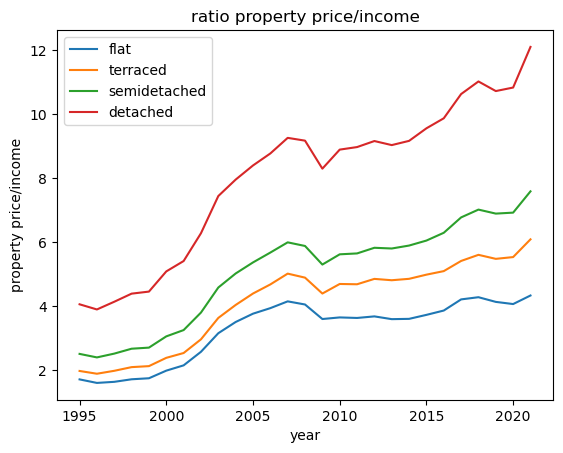

In [45]:
aff_plot = df_affordability.plot(x='year', \
y =['flat_price','terraced_price','semidetached_price','detached_price'], \
label = ['flat','terraced','semidetached','detached'], \
title = 'ratio property price/income', \
ylabel = 'property price/income') ;

Let's zoom in 2021 and see what is affordable right now

In [46]:
df_2021 = df_mod_housing[df_mod_housing['year'] == 2021]

In [47]:
df_2021.head(2)

,year,month,date,region,average_price,sales_volume,detached_price,semidetached_price,terraced_price,flat_price
204,2021,1,2021-01-01,Aberdeenshire,179923.9010,329.0,255915.7796,156177.1014,129518.3662,96663.05678
205,2021,2,2021-01-02,Aberdeenshire,180406.3732,307.0,257000.3041,156540.6089,129801.6509,96367.81141


In [48]:
df_2021 = df_2021.merge(df_income, how = 'left', on = 'year')

In [49]:
for col in cols_for_maths:
    df_2021[f'ratio_{col}'] = df_2021[col]/df_2021['income_median']

In [50]:
df_2021.rename(columns = {'income_median':'income', \
                                            'ratio_detached_price':'detached', \
                                            'ratio_semidetached_price':'semidetached', \
                                            'ratio_terraced_price':'terraced', \
                                            'ratio_flat_price':'flat'},inplace = True)

In [51]:
df_2021 = df_2021.groupby('region')[['income',
       'detached', 'semidetached',
       'terraced', 'flat']].median()

In [52]:
df_2021

,income,detached,semidetached,terraced,flat
region,,,,,
Aberdeenshire,32349.0,8.353747,5.109642,4.243926,3.103717
Adur,32349.0,16.287415,11.858804,10.222627,6.327388
Allerdale,32349.0,7.751498,5.031183,4.183521,3.213731
Amber Valley,32349.0,9.042407,5.622224,4.644384,3.558410
Angus,32349.0,7.943714,5.078552,3.662363,2.738313
...,...,...,...,...,...
Wychavon,32349.0,13.821759,8.211313,6.411797,4.439958
Wyre,32349.0,7.982326,5.126274,4.103379,2.924310
Wyre Forest,32349.0,10.569196,6.516106,5.285798,3.577798


Let's see what is affordable out of the 421 regions

In [53]:
def affordable_single(data,property_type):
    aff_dataset = data[data[property_type] < 4.5]
    return aff_dataset

In [54]:
def affordable_couples(data,property_type):
    aff_dataset = data[data[property_type] < 9]
    return aff_dataset

In [55]:
num_aff_single = []
for word in ['flat','terraced','semidetached','detached']:
    aff_word = affordable_single(df_2021,word)
    num_aff = aff_word.shape[0]
    perc = round(num_aff/4.21,1)
    print(f'{num_aff} areas({perc}% of all areas) for affordable {word} properties for single people')
    num_aff_single.append(perc)

230 areas(54.6% of all areas) for affordable flat properties for single people
116 areas(27.6% of all areas) for affordable terraced properties for single people
39 areas(9.3% of all areas) for affordable semidetached properties for single people
10 areas(2.4% of all areas) for affordable detached properties for single people


In [56]:
num_aff_couples = []
for word in ['flat','terraced','semidetached','detached']: 
    aff_word = affordable_couples(df_2021,word)
    num_aff = aff_word.shape[0]
    perc = round(num_aff/4.21,1)
    print(f'{num_aff} areas({perc}% of all areas) for affordable {word} properties for couples')
    num_aff_couples.append(perc)

382 areas(90.7% of all areas) for affordable flat properties for couples
322 areas(76.5% of all areas) for affordable terraced properties for couples
266 areas(63.2% of all areas) for affordable semidetached properties for couples
116 areas(27.6% of all areas) for affordable detached properties for couples


The following code creates a DataFrame df_areas containing some relevant information from the above statements

In [57]:
df_areas = pd.DataFrame()

In [58]:
df_areas = pd.DataFrame({'single_buyer':num_aff_single,'couples': num_aff_couples})
df_areas.rename(index={0:'flat', 1:'terraced',2:'semidetached',3:'detached'},inplace=True)
df_areas = df_areas.transpose()

In [59]:
df_areas

,flat,terraced,semidetached,detached
single_buyer,54.6,27.6,9.3,2.4
couples,90.7,76.5,63.2,27.6


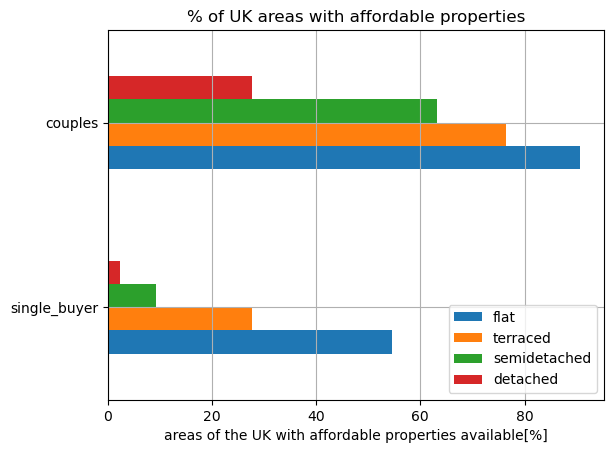

In [60]:
df_areas.plot.barh(title='% of UK areas with affordable properties',\
                  xlabel = 'areas of the UK with affordable properties available[%]', \
                  );
plt.grid()

Let's see a few areas where single buyers and couple can find a property they can afford

In [61]:
aff_single_flat = affordable_single(df_2021,'flat')
aff_single_flat.sample(5).index

Index(['Wales', 'Kirklees', 'South Kesteven', 'Wirral', 'West Lancashire'], dtype='object', name='region')

In [62]:
aff_couples_semi = affordable_couples(df_2021,'semidetached')
aff_couples_semi.sample(5).index

Index(['Melton', 'Isle of Anglesey', 'City of London', 'North Lanarkshire',
       'City of Glasgow'],
      dtype='object', name='region')

Now that it is more clear how many areas hold affordable properties, the next question would be when would be the best moment to buy a house.
To gain some extra insight into the affordability, a new DataFrame df_rates is created containing data from commercial comparison website Uswitch

In [63]:
df_rates = pd.read_csv('data/rates.csv')

In [64]:
df_rates.head(2)

,Unnamed: 0,95LTV 2 years,95 ltv 5 years,90ltv 2yrs,90ltv 5yrs,85ltv 2yrs,85ltv 5yrs,Unnamed: 7,Unnamed: 8
0,NaN,Nationwide BS\nInitial rate: 5.3% | APRC: 7.8%,Family Building Society (NCBS)\nInitial rate: ...,HSBC\nInitial rate: 4.89% | APRC: 6.9%,HSBC\nInitial rate: 4.45% | APRC: 6.2%,Nationwide BS\nInitial rate: 4.6% | APRC: 7.6%,Nationwide BS\nInitial rate: 4.28% | APRC: 6.7%,NaN,Mortgage term 25 years data from Uswitch
1,NaN,Leeds BS\nInitial rate: 5.3% | APRC: 7.7%,Tipton & Coseley BS\nInitial rate: 4.85% | APR...,Santander UK Plc\nInitial rate: 4.89% | APRC: ...,Santander UK Plc\nInitial rate: 4.47% | APRC: ...,Santander UK Plc\nInitial rate: 4.64% | APRC: ...,NatWest\nInitial rate: 4.33% | APRC: 6.7%,NaN,NaN


In [65]:
df_rates_copy = df_rates.copy()

In [66]:
df_rates_copy.columns

Index(['Unnamed: 0', '95LTV 2 years', '95 ltv 5 years', '90ltv 2yrs',
       '90ltv 5yrs', '85ltv 2yrs', '85ltv 5yrs', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [67]:
df_rates_copy.rename(columns = {'Unnamed: 0':'unnamed', '95LTV 2 years':'95ltv_24m', \
                                '95 ltv 5 years':'95ltv_60m', '90ltv 2yrs':'90ltv_24m',
                                '90ltv 5yrs':'90ltv_60m', '85ltv 2yrs':'85ltv_24m',\
                                '85ltv 5yrs':'85ltv_60m', 'Unnamed: 7':'unnamed7', 'Unnamed: 8':'unnamed8'},\
                     inplace = True)

In [68]:
df_rates_copy.head(2)

,unnamed,95ltv_24m,95ltv_60m,90ltv_24m,90ltv_60m,85ltv_24m,85ltv_60m,unnamed7,unnamed8
0,NaN,Nationwide BS\nInitial rate: 5.3% | APRC: 7.8%,Family Building Society (NCBS)\nInitial rate: ...,HSBC\nInitial rate: 4.89% | APRC: 6.9%,HSBC\nInitial rate: 4.45% | APRC: 6.2%,Nationwide BS\nInitial rate: 4.6% | APRC: 7.6%,Nationwide BS\nInitial rate: 4.28% | APRC: 6.7%,NaN,Mortgage term 25 years data from Uswitch
1,NaN,Leeds BS\nInitial rate: 5.3% | APRC: 7.7%,Tipton & Coseley BS\nInitial rate: 4.85% | APR...,Santander UK Plc\nInitial rate: 4.89% | APRC: ...,Santander UK Plc\nInitial rate: 4.47% | APRC: ...,Santander UK Plc\nInitial rate: 4.64% | APRC: ...,NatWest\nInitial rate: 4.33% | APRC: 6.7%,NaN,NaN


In [69]:
mortgage_term = 25
num_rep = mortgage_term * 12

In [70]:
#dropping unnecessary columns
df_rates_copy.drop(['unnamed','unnamed7','unnamed8'],axis=1,inplace=True)

The following function creates the APRC rate which is crucial to determine how much the mortgage will cost over the repayment period (25years)

In [71]:
def interest(txt):
    q = []
    txt = txt.split()
    for text in txt:
        if '%' in text:
            q.append(text)
            
    q[1] = (float(q[1].strip('%')))
    
    return q[1]

In [72]:
df_rates_copy = df_rates_copy.applymap(interest)

In [73]:
df_rates_copy

,95ltv_24m,95ltv_60m,90ltv_24m,90ltv_60m,85ltv_24m,85ltv_60m
0,7.8,7.0,6.9,6.2,7.6,6.7
1,7.7,7.2,7.3,6.5,7.2,6.7
2,7.8,7.3,7.7,6.4,7.1,6.8
3,6.7,7.0,7.2,6.2,8.3,6.3


Let's now find the cost of the mortgage by creating the new DataFrame df_rates_cost and applying the standard mortgage replayment formula to it

In [74]:
df_rates_cost = df_rates_copy.copy()

for m in [24,60]:
    for l in [95,90,85]:
        for i in range(0,4):
            
            rate = df_rates_cost.loc[i,f'{l}ltv_{m}m']/(1200)
            
            p_a = (1+rate) ** num_rep
            
            cost = (rate * p_a)/ (p_a - 1)
            
            df_rates_cost.loc[i,f'{l}ltv_{m}m'] = cost*num_rep
            
df_rates_cost

,95ltv_24m,95ltv_60m,90ltv_24m,90ltv_60m,85ltv_24m,85ltv_60m
0,2.275843,2.120338,2.101238,1.969746,2.236524,2.063272
1,2.256147,2.158766,2.178094,2.025621,2.158766,2.063272
2,2.275843,2.178094,2.256147,2.006916,2.139514,2.082216
3,2.063272,2.120338,2.158766,1.969746,2.375383,1.988290


In [75]:
df_rates_cost.rename(columns = {'95ltv_24m':  '5%_deposit_2yrs_fixed', \
                                '95ltv_60m':  '5%_deposit_5yrs_fixed', \
                                '90ltv_24m' : '10%_deposit_2yrs_fixed', \
                                '90ltv_60m' : '10%_deposit_5yrs_fixed', \
                                '85ltv_24m' : '15%_deposit_2yrs_fixed', \
                                '85ltv_60m' : '15%_deposit_5yrs_fixed'}, inplace = True)

In [76]:
df_rates_cost

,5%_deposit_2yrs_fixed,5%_deposit_5yrs_fixed,10%_deposit_2yrs_fixed,10%_deposit_5yrs_fixed,15%_deposit_2yrs_fixed,15%_deposit_5yrs_fixed
0,2.275843,2.120338,2.101238,1.969746,2.236524,2.063272
1,2.256147,2.158766,2.178094,2.025621,2.158766,2.063272
2,2.275843,2.178094,2.256147,2.006916,2.139514,2.082216
3,2.063272,2.120338,2.158766,1.969746,2.375383,1.988290


Let's see the cost and barriers of buyers taking on a mortgage at the top of their budget (4.5x annual income)

In [77]:
income = df_income.loc[44,'income_median']
income

32349

In [78]:
df_mortgage_single = df_rates_cost * income * 4.5
df_mortgage_single

,5%_deposit_2yrs_fixed,5%_deposit_5yrs_fixed,10%_deposit_2yrs_fixed,10%_deposit_5yrs_fixed,15%_deposit_2yrs_fixed,15%_deposit_5yrs_fixed
0,331295.620738,308658.603411,305878.299478,286736.952081,325571.920858,300351.601789
1,328428.510872,314252.656807,317066.219273,294870.732243,314252.656807,300351.601789
2,331295.620738,317066.219273,328428.510872,292147.711725,311450.086960,303109.268097
3,300351.601789,308658.603411,314252.656807,286736.952081,345785.629051,289436.421663


In [79]:
df_mortgage_couple = df_rates_cost * income * 4.5 * 2
df_mortgage_couple

,5%_deposit_2yrs_fixed,5%_deposit_5yrs_fixed,10%_deposit_2yrs_fixed,10%_deposit_5yrs_fixed,15%_deposit_2yrs_fixed,15%_deposit_5yrs_fixed
0,662591.241475,617317.206822,611756.598956,573473.904162,651143.841716,600703.203578
1,656857.021745,628505.313613,634132.438546,589741.464486,628505.313613,600703.203578
2,662591.241475,634132.438546,656857.021745,584295.423450,622900.173921,606218.536193
3,600703.203578,617317.206822,628505.313613,573473.904162,691571.258102,578872.843326


In [80]:
df_mortgage_couple.rename(index={0:'provider_a', 1:'provider_b',2:'provider_c',3:'provider_d'},inplace=True)

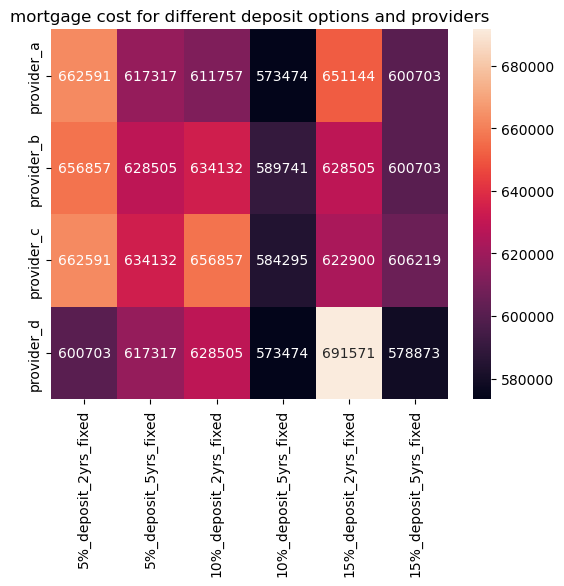

In [81]:
sns.heatmap(data = df_mortgage_couple, annot = True, fmt = '.0f');
plt.title('mortgage cost for different deposit options and providers');

The potential saving of saving up for a bigger deposit can be up to 100k for couples and 40-50k for single buyers.

But..

Most people try to save a deposit while paying rent, so customers might end up paying the same amount or more in rent
than what they would save on their mortgage costs.

In [82]:
#case a: single buyers paying £1000 in rent and saving £250 per month

cost_rent_single = []

for d in [95,90,85]:
    
    dep = int(income * 4.5* (1-0.01*d))
    saving = 250
    months = int(dep/saving)
    rent = months * 1000
    cost_rent_single.append(rent)
    
    print(f'for {d} ltv, a single buyer would\
 need to save £{dep} deposit which will take {months} months and cost\
 you {rent} in rent')

for 95 ltv, a single buyer would need to save £7278 deposit which will take 29 months and cost you 29000 in rent
for 90 ltv, a single buyer would need to save £14557 deposit which will take 58 months and cost you 58000 in rent
for 85 ltv, a single buyer would need to save £21835 deposit which will take 87 months and cost you 87000 in rent


In [83]:
#case b: couple paying £1350 in rent and saving £400 per month

cost_rent_couple = []

for d in [95,90,85]:
    dep = int(income * 4.5*2* (1-0.01*d))
    saving = 400
    months = int(dep/saving)
    rent = months * 1350
    cost_rent_couple.append(rent)
    
    print(f'for {d} ltv, couples would\
 need to save £{dep} deposit which will take {months} months and cost\
 you {rent} in rent')

for 95 ltv, couples would need to save £14557 deposit which will take 36 months and cost you 48600 in rent
for 90 ltv, couples would need to save £29114 deposit which will take 72 months and cost you 97200 in rent
for 85 ltv, couples would need to save £43671 deposit which will take 109 months and cost you 147150 in rent


Waiting can be a costly decision..
Let's compare cost in rent and savings from mortgage costs in a new df_cost DataFrame

In [84]:
df_cost = df_mortgage_couple.copy()

In [85]:
df_cost['10%deposit_saving']= 0.5 *(df_cost.iloc[:,2]).mean() + 0.5*(df_cost.iloc[:,3]).mean() - max(max(df_cost.iloc[:,0]),max(df_cost.iloc[:,1]))
df_cost['15%deposit_saving']= 0.5 *(df_cost.iloc[:,4]).mean() + 0.5*(df_cost.iloc[:,5]).mean() - max(max(df_cost.iloc[:,0]),max(df_cost.iloc[:,1]))

The above costs compare a situation of 5% deposit holder securing a mortgage at a higher rate due to their low deposit and what would happen if they save up and secure a deal at the average market rate for 10% and 15% deposit options

In [86]:
df_cost= df_cost.iloc[[0],[6,7]]

In [87]:
df_cost

,10%deposit_saving,15%deposit_saving
provider_a,-56061.732835,-40013.944722


In [88]:
for j in range(2,4):
    df_cost[f'{j*5}%deposit_cost'] = cost_rent_couple[j-1]-cost_rent_couple[0]

In [89]:
df_cost

,10%deposit_saving,15%deposit_saving,10%deposit_cost,15%deposit_cost
provider_a,-56061.732835,-40013.944722,48600,98550


In [90]:
df_cost.loc[len(df_cost.index)] = [0.5* df_cost.iloc[0,0],0.5*df_cost.iloc[0,1],\
                                   cost_rent_single[1]-cost_rent_single[0],\
                                   cost_rent_single[2]-cost_rent_single[0]]

In [91]:
df_cost

,10%deposit_saving,15%deposit_saving,10%deposit_cost,15%deposit_cost
provider_a,-56061.732835,-40013.944722,48600.0,98550.0
1,-28030.866418,-20006.972361,29000.0,58000.0


In [92]:
df_cost = df_cost[['10%deposit_saving','10%deposit_cost','15%deposit_saving','15%deposit_cost']]

In [93]:
df_cost.rename(index={'provider_a':'couples', 1:'single_buyer'},inplace=True)

In [94]:
df_cost = df_cost.applymap(abs)

In [95]:
df_cost

,10%deposit_saving,10%deposit_cost,15%deposit_saving,15%deposit_cost
couples,56061.732835,48600.0,40013.944722,98550.0
single_buyer,28030.866418,29000.0,20006.972361,58000.0


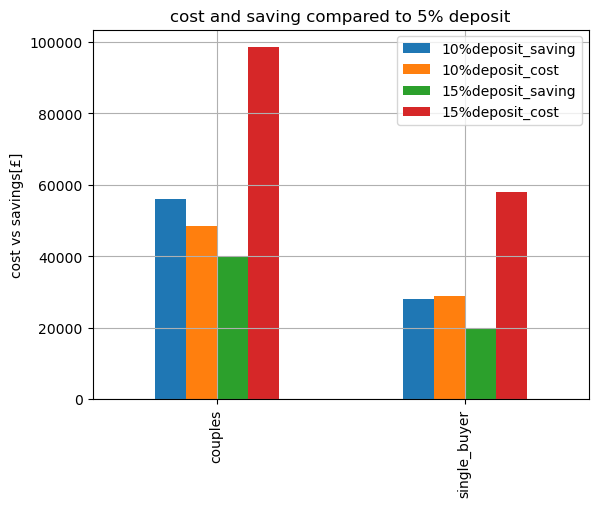

In [96]:
df_cost.plot.bar(title='cost and saving compared to 5% deposit',\
                  ylabel = 'cost vs savings[£]', \
                  );
plt.grid()

It turns out indeed, especially when trying to save for a 15% deposit, that savings on the mortgage costs are outstripped by rent paid over the years